<a href="https://colab.research.google.com/github/Mayte-Tixi/Machine-Learning/blob/main/correlaciondepearson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# graficos que se manejan para analisis de datos
#Generar un diagrama de dispersion, para esto se va trabajar con housing.data
import pandas as pd
import matplotlib.pyplot as plt


In [32]:
ruta="housing.csv"
# Leer el archivo CSV manejando saltos de línea dentro de las comillas
df=pd.read_csv(
   ruta,
    delimiter=',',
    quotechar='"',
    skipinitialspace=True,
    engine='python')
df.drop(columns=['Address'], inplace=True)  # Eliminar la columna problemática
print(df.head())


   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  
0                          4.09      23086.80050  1.059034e+06  
1                          3.09      40173.07217  1.505891e+06  
2                          5.13      36882.15940  1.058988e+06  
3                          3.26      34310.24283  1.260617e+06  
4                          4.23      26354.10947  6.309435e+05  


In [33]:
#la matriz de correlacion me ayuda a analizar que variables tienen relacion para lo cual se va utilizar
#Ahora, para calcular la matriz de correlación con el coeficiente de Pearson, puedes usar el método corr() de pandas.
matrix_correlacion=df.corr()
#mostrar la matriz de correlacion
print(matrix_correlacion)


                              Avg. Area Income  Avg. Area House Age  \
Avg. Area Income                      1.000000            -0.002007   
Avg. Area House Age                  -0.002007             1.000000   
Avg. Area Number of Rooms            -0.011032            -0.009428   
Avg. Area Number of Bedrooms          0.019788             0.006149   
Area Population                      -0.016234            -0.018743   
Price                                 0.639734             0.452543   

                              Avg. Area Number of Rooms  \
Avg. Area Income                              -0.011032   
Avg. Area House Age                           -0.009428   
Avg. Area Number of Rooms                      1.000000   
Avg. Area Number of Bedrooms                   0.462695   
Area Population                                0.002040   
Price                                          0.335664   

                              Avg. Area Number of Bedrooms  Area Population  \
Avg. Area

In [37]:
#crear un grafico para analizar mejor
#!pip install seaborn # instalamos la libreria  seaborn sirve para hacer graficos elegantes
import seaborn as sns
import matplotlib.pyplot as plt

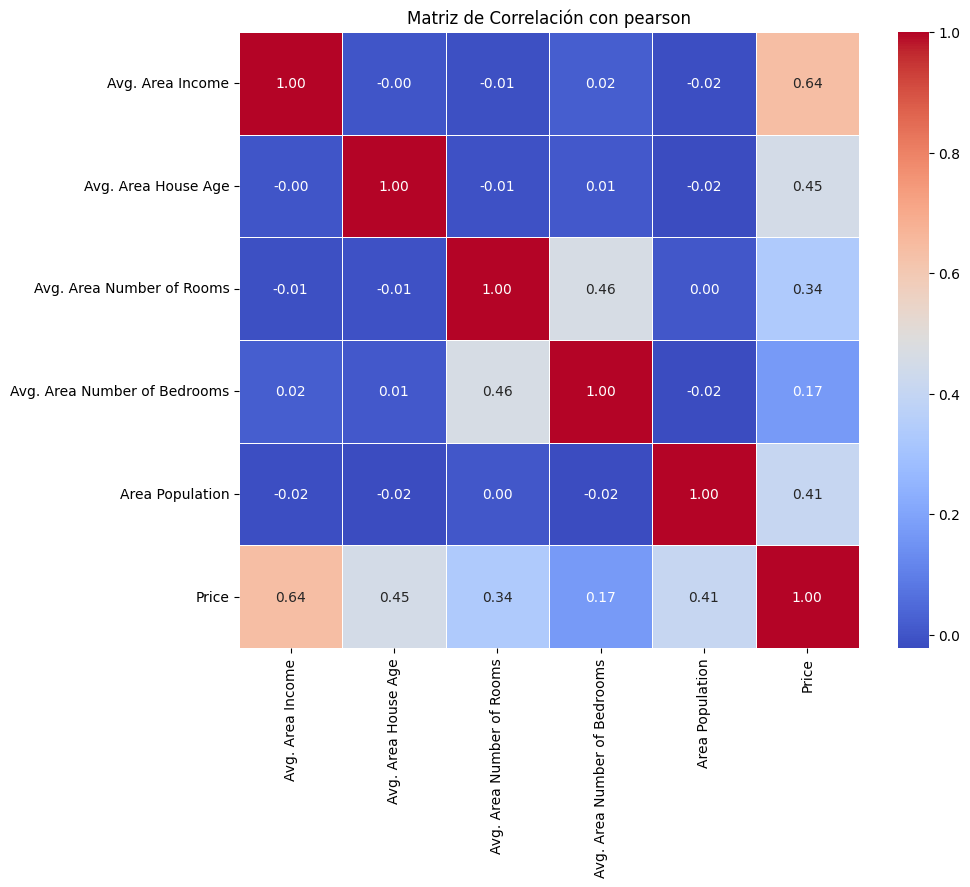

In [39]:
#annot=True: Muestra los valores numéricos en las celdas del mapa de calor.
#cmap='coolwarm': Establece una paleta de colores para que los valores positivos
#se muestren en tonos cálidos y los negativos en tonos fríos.
#fmt='.2f': Muestra los valores con dos decimales.
#linewidths=0.5: Agrega un pequeño borde entre las celdas.
plt.figure(figsize=(10,8))
sns.heatmap(matrix_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación con pearson')
plt.show()


In [49]:
#Con el conjunto de datos de los inmuebles genera la matriz de covarianza
# la funcion cov() esta dentro de la libreria numpy
import numpy as np
matriz_covarianza=df.cov()
print(matriz_covarianza)

#permite visualizar solamente la matriz
#matriz_covarianza = np.cov(df, rowvar=False)  # rowvar=False para tratar cada columna como una variable
# Mostrar la matriz de covarianza
#print("Matriz de Covarianza:")
#print(matriz_covarianza)

                              Avg. Area Income  Avg. Area House Age  \
Avg. Area Income                  1.135928e+08           -21.205997   
Avg. Area House Age              -2.120600e+01             0.982985   
Avg. Area Number of Rooms        -1.182612e+02            -0.009402   
Avg. Area Number of Bedrooms      2.602829e+02             0.007524   
Area Population                  -1.717327e+06          -184.444655   
Price                             2.407654e+09        158435.437815   

                              Avg. Area Number of Rooms  \
Avg. Area Income                            -118.261183   
Avg. Area House Age                           -0.009402   
Avg. Area Number of Rooms                      1.011700   
Avg. Area Number of Bedrooms                   0.574360   
Area Population                               20.365721   
Price                                     119220.442373   

                              Avg. Area Number of Bedrooms  Area Population  \
Avg. Area

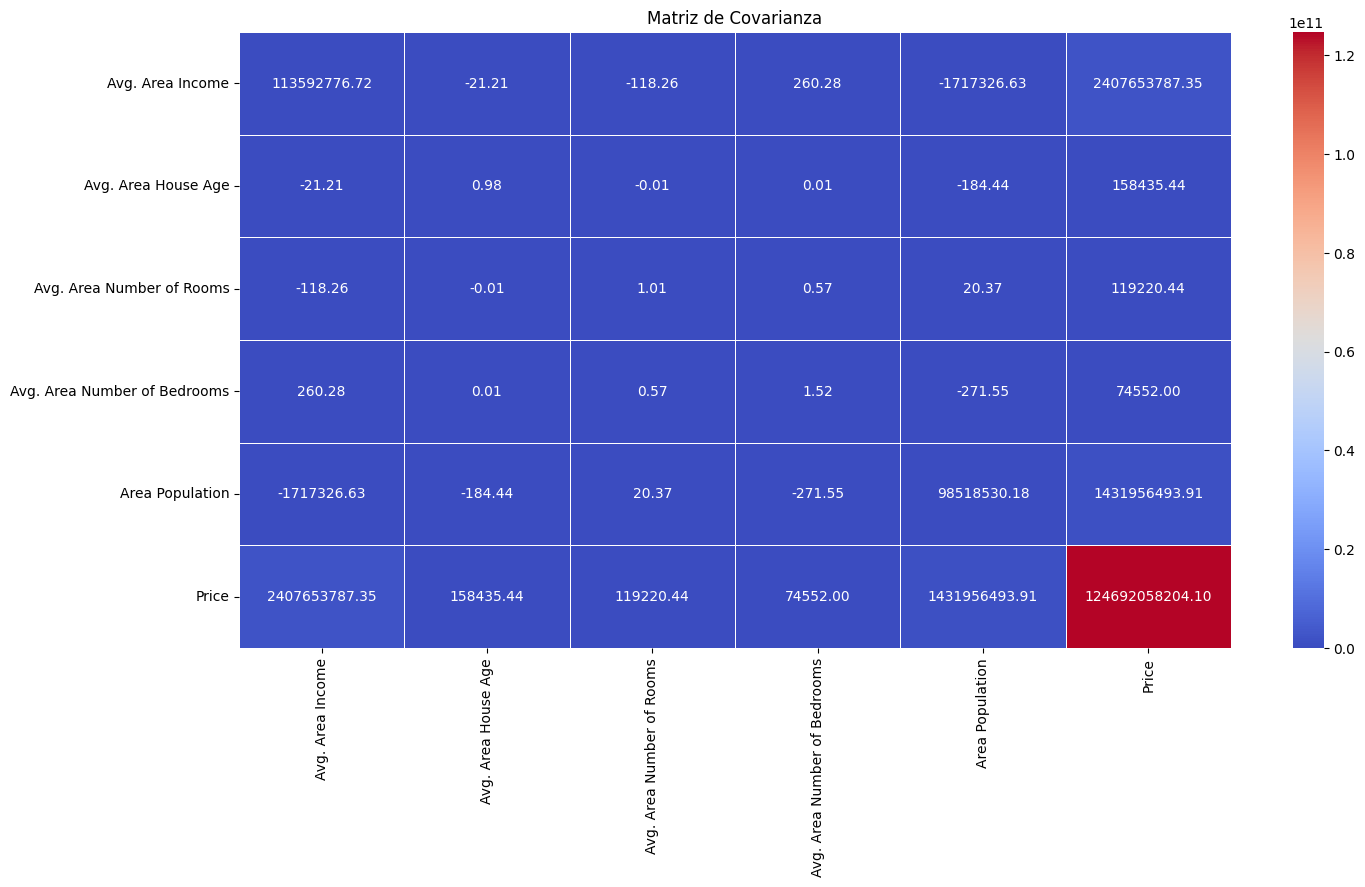

In [50]:
# disenar el grafico para visualizar los datos de la matriz de covarinza
plt.figure(figsize=(16, 8))
sns.heatmap(matriz_covarianza, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, xticklabels=matriz_covarianza.columns, yticklabels=matriz_covarianza.columns)
plt.title('Matriz de Covarianza')
plt.show()

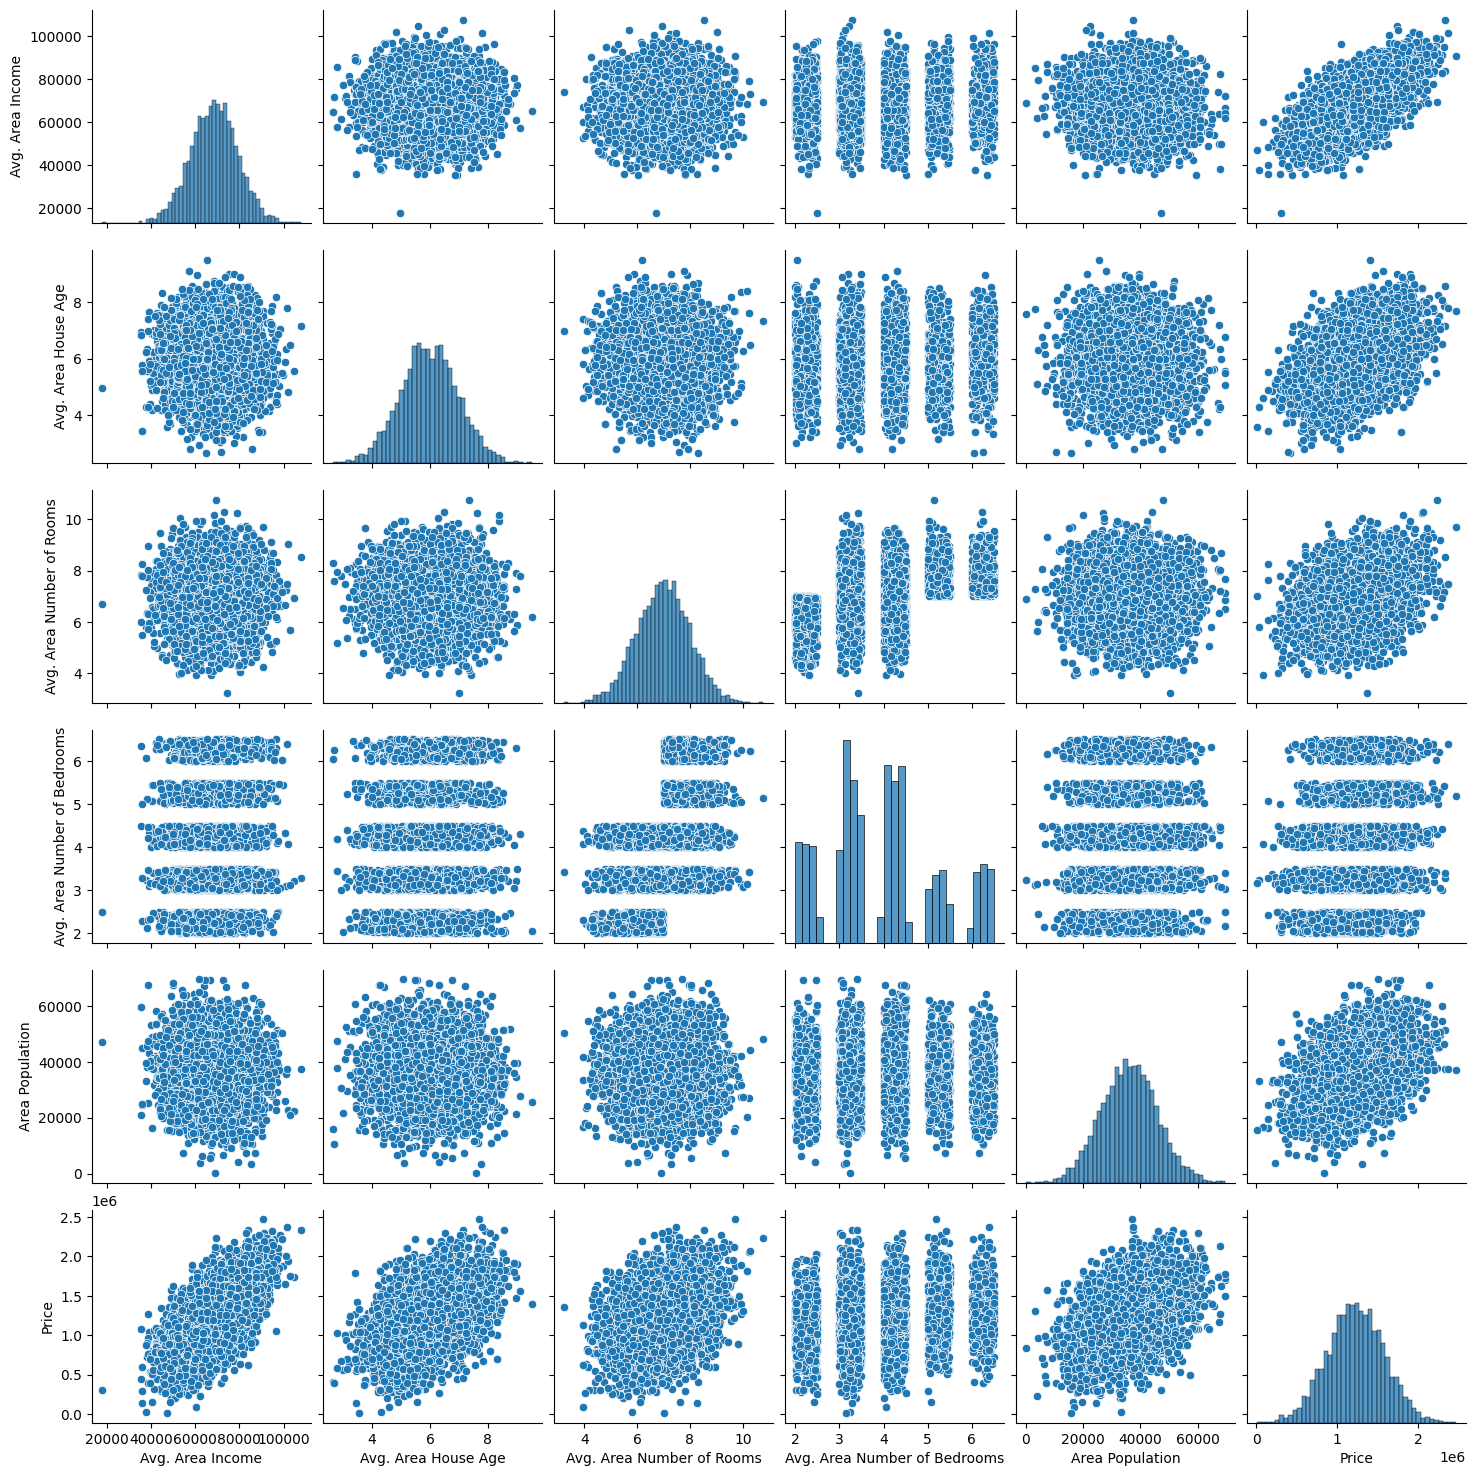

In [51]:
#Si quieres analizar la relación entre más de dos variables, puedes usar sns.pairplot(), que crea una matriz de diagramas
# de dispersión para todas las combinaciones posibles de las variables numéricas.

sns.pairplot(df)
plt.show()

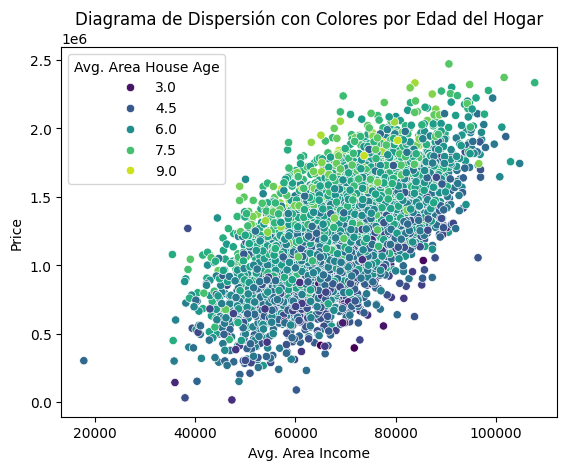

In [52]:
#Si quieres personalizar el diagrama, puedes agregar más opciones como colores,
# tamaños de los puntos o incluso ajustarlos a través de hue o style.
#Este ejemplo coloreará los puntos según la variable Avg. Area House Age, permitiendo observar si hay alguna relación visible con esta variable.
sns.scatterplot(data=df, x='Avg. Area Income', y='Price', hue='Avg. Area House Age', palette='viridis')
plt.title('Diagrama de Dispersión con Colores por Edad del Hogar')
plt.show()

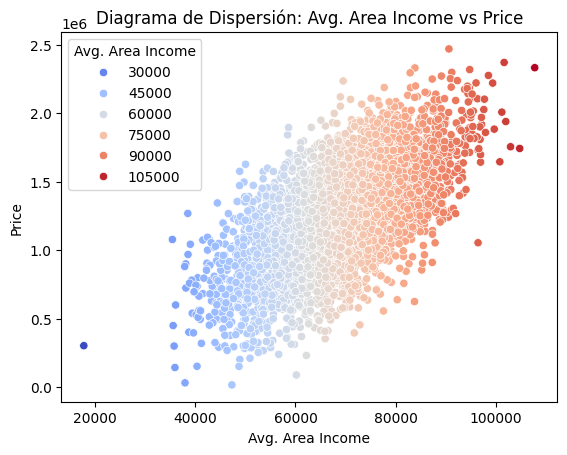

In [56]:
# Crear un diagrama de dispersión entre dos variables
# Por ejemplo, entre 'Avg. Area Income' y 'Price'
#hue='Avg. Area Income': Los puntos del gráfico se colorearán según los valores de 'Avg. Area Income'.
#palette='coolwarm': Esto define una paleta de colores. Puedes cambiarla a otra, como 'viridis', 'plasma', etc.
sns.scatterplot(data=df, x='Avg. Area Income', y='Price',hue="Avg. Area Income",palette='coolwarm')

# Añadir título y etiquetas
plt.title('Diagrama de Dispersión: Avg. Area Income vs Price')
plt.xlabel('Avg. Area Income')
plt.ylabel('Price')

# Mostrar el gráfico
plt.show()